In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt' )
nltk.download('stopwords')
nltk.download('wordnet')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import string
def preprocess(t):
  w=word_tokenize(t. lower())
  data=list()
  for word in w:
    if word. lower() not in stop_words:
      data.append (word)
  text=' '.join(data)
  return text.translate(str.maketrans('', '', string.punctuation))

In [ ]:
from textblob import TextBlob
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  return TextBlob (text) . sentiment.polarity

2) For Sentiment Analysis on temu Dataset

In [ ]:
temu=pd.read_csv('/content/drive/MyDrive/SEM 8/SMA/temu4.csv')
temu=temu.drop(columns=['Review Id', 'User Name', 'Images', 'Video', 'Avatar', 'Goods Id', 'Date', 'Scraped At'])
temu.head()

Rating                                            Comment
0       5  thank you works well, perfect for my phone, ni...
1       5  Very good value for money and makes my phone l...
2       5  Fantastic product and fits very well. Feel gre...
3       1  Terribly workmanship, after tilting the stand ...
4       1  This isn’t as advertised. Images are deceptive...

In [ ]:
temu.rename(columns={'Comment': 'Review'}, inplace=True)
temu ['Review' ]=temu ['Review' ]. apply(preprocess)
temu ['Review' ].reset_index(drop=True, inplace=True)
temu['subjectivity' ]=temu['Review']. apply(get_subjectivity)
temu ['polarity' ]=temu ['Review' ].apply(get_polarity)
temu.head()

Rating                                             Review  subjectivity  \
0       5  thank works well  perfect phone  nice product ...       0.75119   
1       5  good value money makes phone look better well ...       0.55000   
2       5  fantastic product fits well  feel great offers...       0.53000   
3       1  terribly workmanship  tilting stand ca nt snap...       0.50000   
4       1  ’ advertised  images deceptive confer robust d...       0.70000   

   polarity  
0  0.630952  
1  0.600000  
2  0.440000  
3 -0.500000  
4  0.400000

<Axes: ylabel='sentiment'>

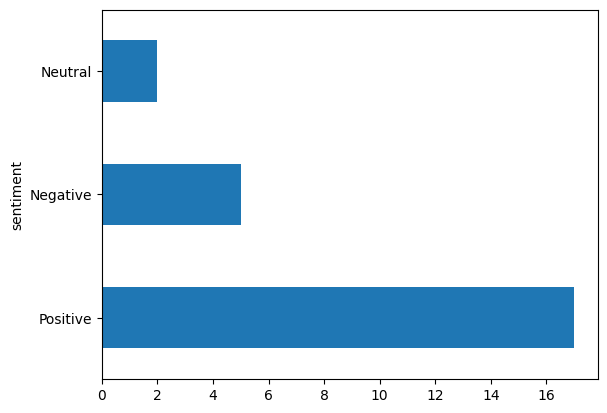

In [ ]:
threshold=0.05
temu['sentiment'] = temu['polarity'].apply(
  lambda x: "Positive" if x >= threshold
  else ("Negative" if x < -threshold else "Neutral"))
temu['sentiment'].value_counts ().plot.barh()

3) For Sentiment Analysis on Amazon Dataset

In [ ]:
amazon=pd.read_csv('/content/drive/MyDrive/SEM 8/SMA/amazon2.csv')
amazon=amazon.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
amazon.head()

rating                                            content
0       5  \nElevate your iPhone 14 ProMax protection wit...
1       5  \nRecently, I purchased a Casekoo Clear case f...
2       5  \nGreat looking just like the photo & fits wel...
3       4  \nAfter four months of daily use, I feel well-...
4       5  \nThis case has some great durability features...

In [ ]:
amazon.rename(columns={'content': 'Review'}, inplace=True)
amazon ['Review']=amazon ['Review']. apply(preprocess)
amazon['Review']. reset_index(drop=True, inplace=True)
amazon['subjectivity']=amazon['Review'].apply(get_subjectivity)
amazon['polarity' ]=amazon['Review'].apply(get_polarity)
amazon.head()

rating                                             Review  subjectivity  \
0       5  elevate iphone 14 promax protection casekoo ma...      0.591922   
1       5  recently  purchased casekoo clear case iphone ...      0.710956   
2       5  great looking like photo  fits well   matte go...      0.620833   
3       4  four months daily use  feel wellpositioned pro...      0.426894   
4       5  case great durability features raised lip arou...      0.475974   

   polarity  
0  0.258631  
1  0.441977  
2  0.525000  
3  0.193068  
4  0.055898

<Axes: ylabel='sentiment'>

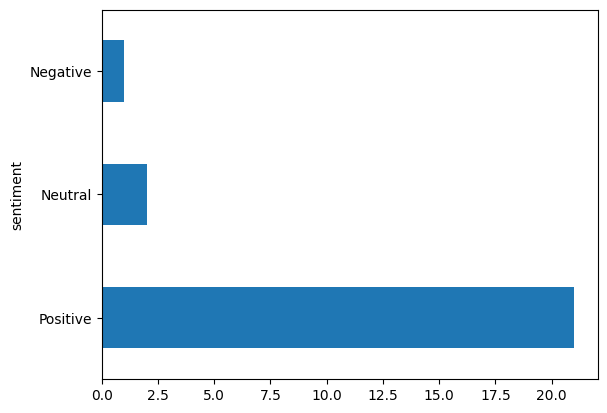

In [ ]:
  threshold=0.05
  amazon['sentiment'] = amazon['polarity'].apply(
    lambda x: "Positive" if x >= threshold
    else ("Negative" if x < -threshold else "Neutral"))
  amazon['sentiment'].value_counts().plot.barh()

4) To Create Comparative Sentiment BarGraph


In [ ]:
temu_sentiments=temu.groupby('sentiment' )['sentiment' ]. count ()
temu_sentiments

sentiment
Negative     5
Neutral      2
Positive    17
Name: sentiment, dtype: int64

In [ ]:
amazon_sentiments=amazon.groupby('sentiment')['sentiment'].count ()
amazon_sentiments

sentiment
Negative     1
Neutral      2
Positive    21
Name: sentiment, dtype: int64

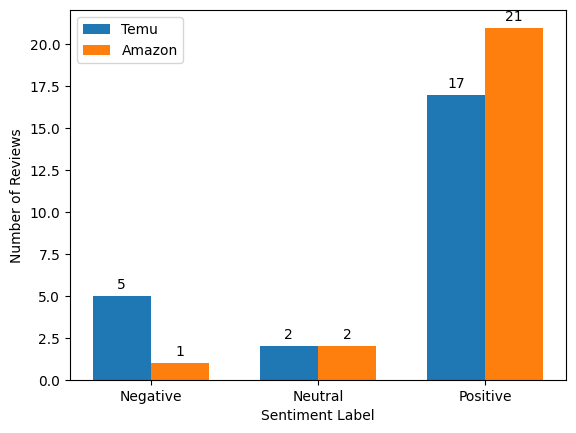

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List of all sentiment categories
sentiment_categories = ['Negative', 'Neutral', 'Positive']

# Grouping and counting sentiment occurrences for temu
temu_sentiments = temu.groupby('sentiment')['sentiment'].count()
temu_sentiments = temu_sentiments.reindex(sentiment_categories, fill_value=0)

# Grouping and counting sentiment occurrences for amazon
amazon_sentiments = amazon.groupby('sentiment')['sentiment'].count()
amazon_sentiments = amazon_sentiments.reindex(sentiment_categories, fill_value=0)

# Plotting
labels = sentiment_categories  # Sentiment labels
x = range(len(labels))
width = 0.35  # width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x, temu_sentiments, width, label='Temu')
bars2 = ax.bar([i + width for i in x], amazon_sentiments, width, label='Amazon')

# Customizing labels and legend
ax.set_xlabel('Sentiment Label')
ax.set_ylabel('Number of Reviews')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

# Function to label bars with their values
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
# Adding labels to the bars
autolabel(bars1)
autolabel(bars2)
plt.show()